## Decision Tree

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv', sep='\t')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Set female=0 and male=1
titanic['Sex'] = titanic['Sex'].map({'female':0 ,'male':1})

In [4]:
# Fill missing ages with median of ages
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [5]:
# Create dummy variables for Embarked 
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [6]:
# Define training set
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic['Survived']
X.head()

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,3,1,22.0,0,1
1,1,0,38.0,0,0
2,3,0,26.0,0,1
3,1,0,35.0,0,1
4,3,1,35.0,0,1


**Decision Tree Model**

In [7]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

**Show Tree**

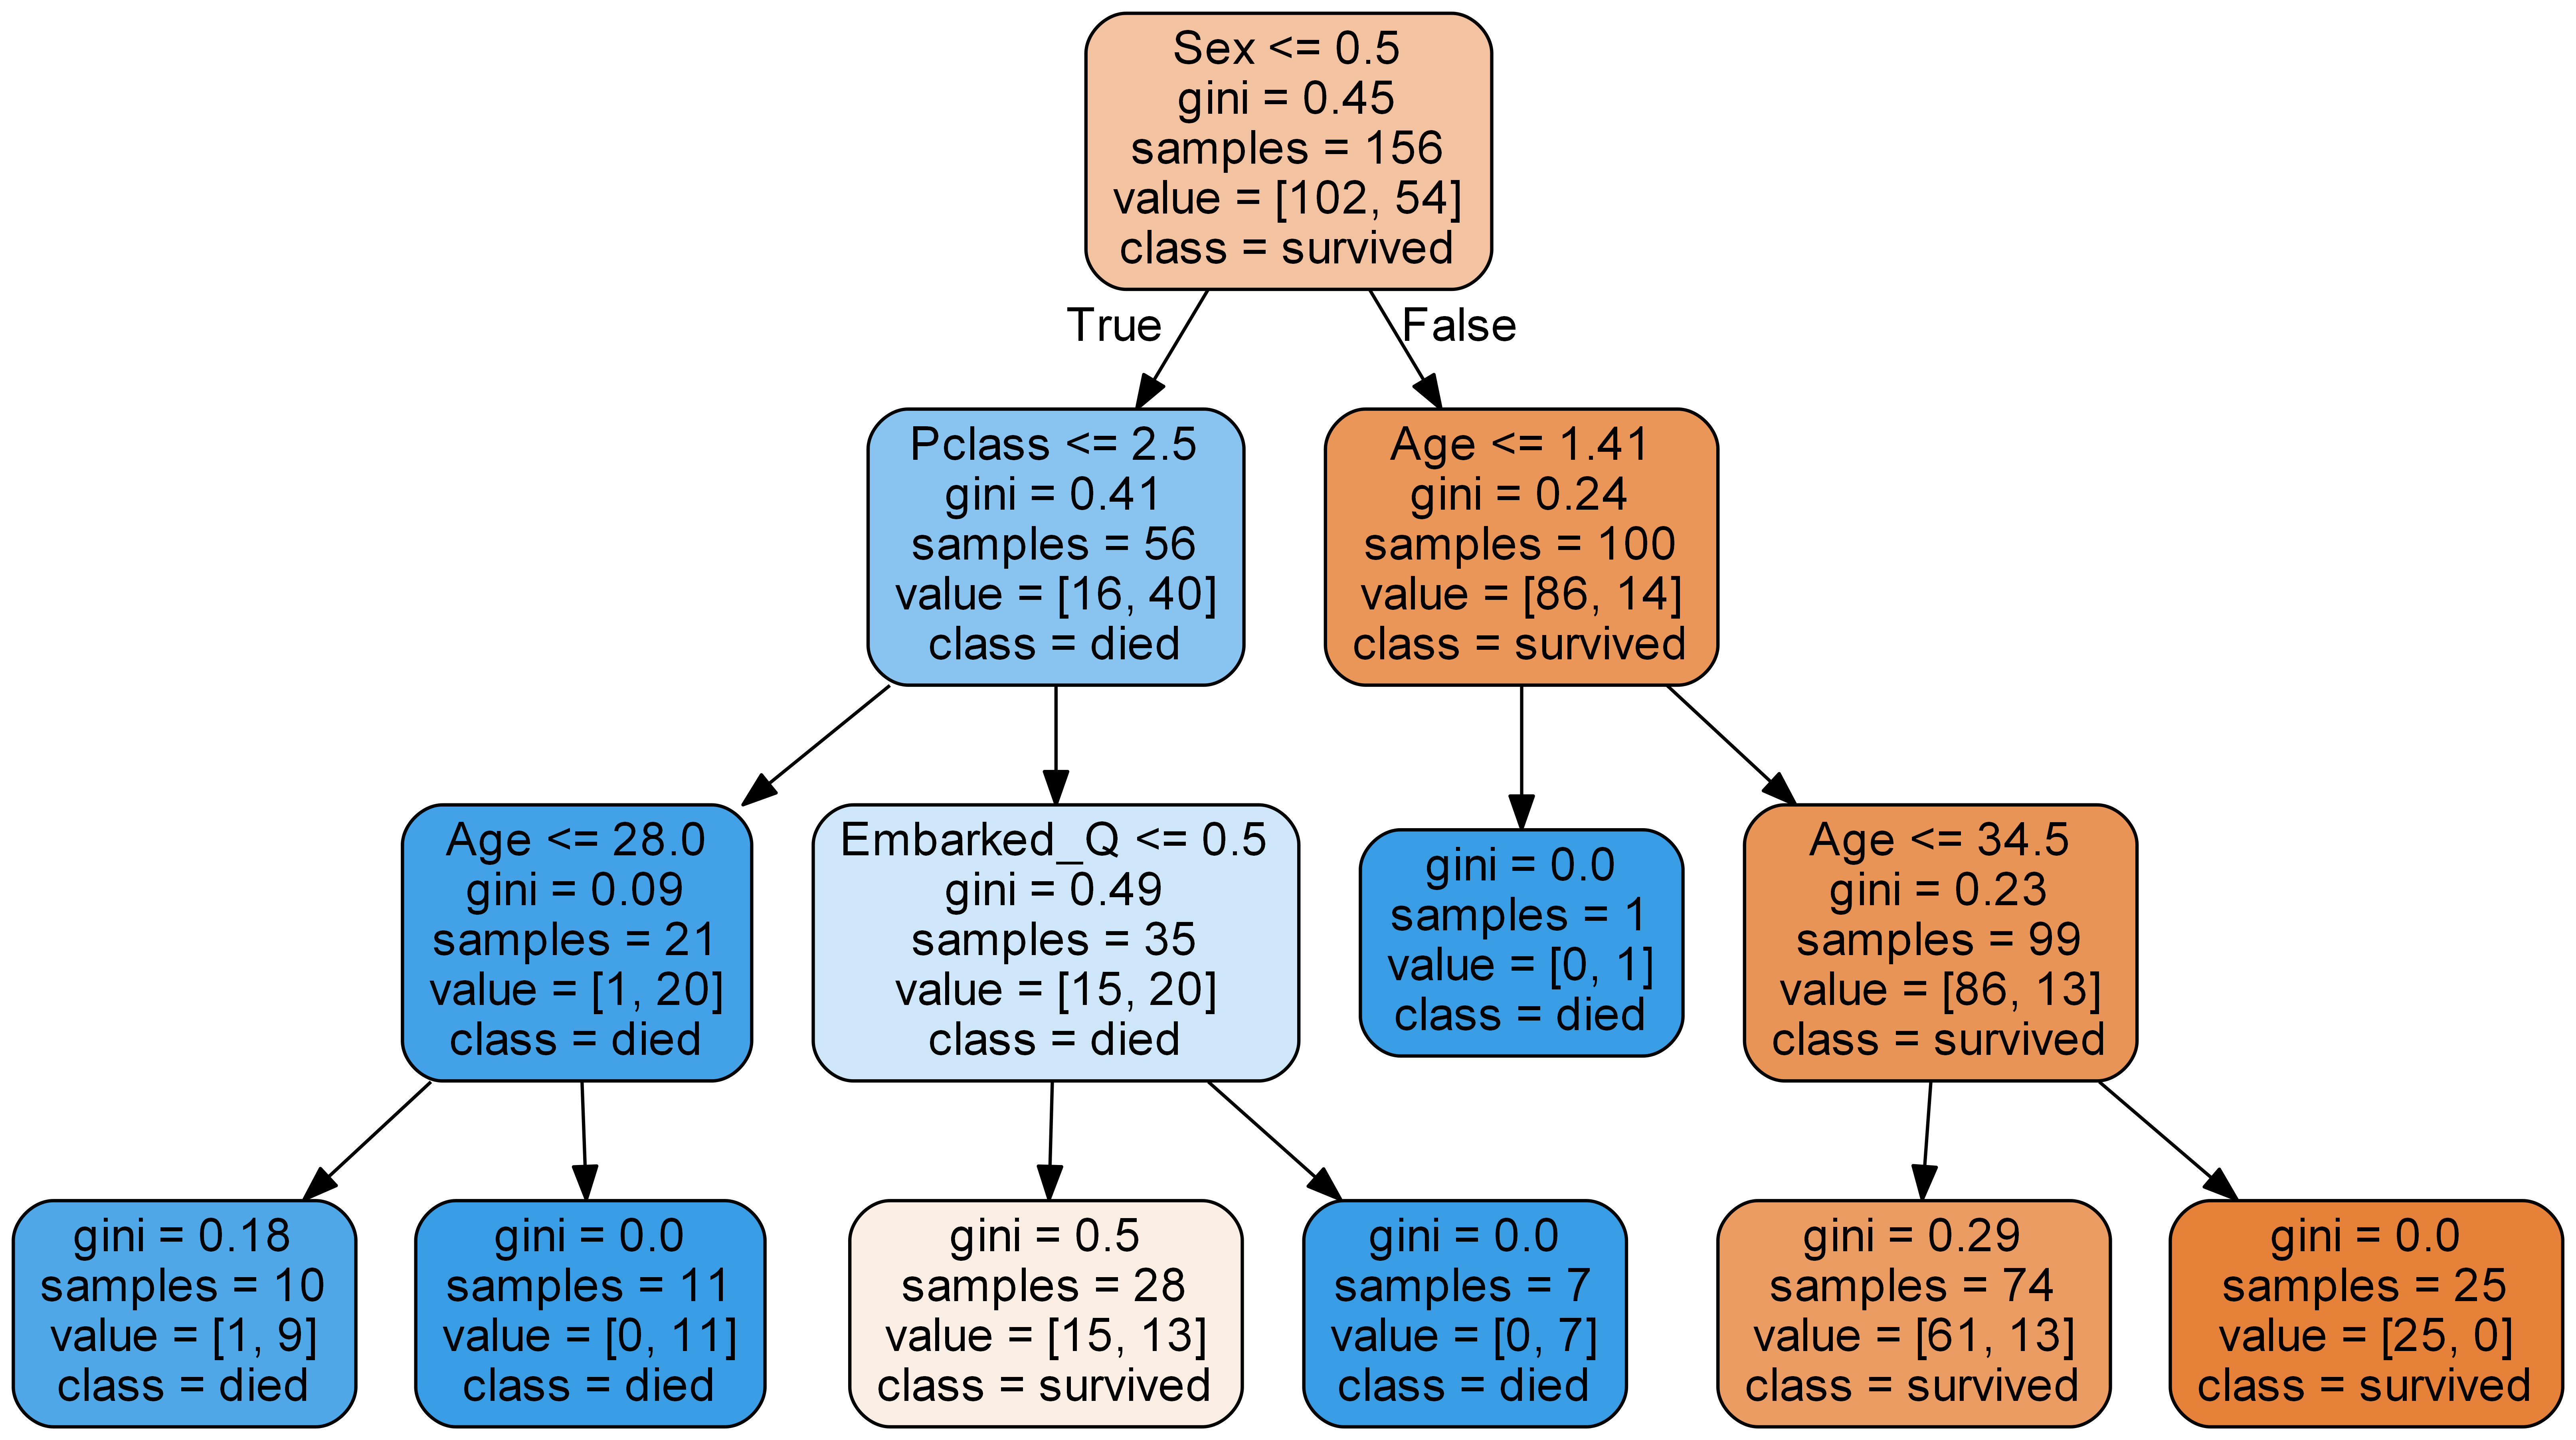

In [8]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(treeclf, out_file='tree.dot', 
                feature_names = feature_cols, class_names=['survived', 'died'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

**Features Importance**

In [9]:
pd.DataFrame({'feature': feature_cols, 'Importance': treeclf.feature_importances_}).sort_values('Importance', ascending=False)

,feature,Importance
1,Sex,0.707777
0,Pclass,0.113872
3,Embarked_Q,0.096080
2,Age,0.082271
4,Embarked_S,0.000000
